In [1]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# accessing the csv file from my google drive
path = "/content/drive/MyDrive/mnist_train.csv"
dataset = pd.read_csv(path)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# entering size of dataset 
data = dataset.values[:8700]
data.shape

(8700, 785)

In [9]:
X, Y = data[:, 1:], data[:, 0]

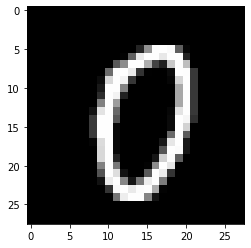

In [10]:
# Plotting digit
im = X[1000].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')

In [11]:
# splitting the dataset as 20 percent for testing
split = int(X.shape[0] * 0.20)
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1740, 784) (1740,)
(6960, 784) (6960,)


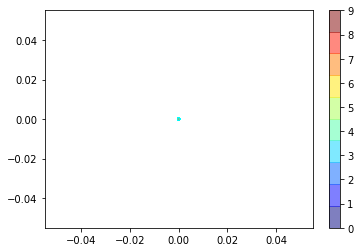

In [12]:
# plotting a scatter plot for our data
plt.scatter(X_train[:8700, 0], X_train[:8700, 1], c=Y_train[:8700], edgecolor='Cyan', alpha=0.5, cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

In [13]:
# using euclidean distance formula
def euclidean(a1, a2):    # we are using euclidean distance in KNN you canyou any other 
    return np.sqrt(np.sum((a1 - a2) ** 2))

In [14]:
# training knn
def knn(X_train, y_train, test_point, k=40):
    
    distances = []
    
    # 1) Compute distances using euclidean
    for data_point, label in zip(X_train, y_train):
        distance = euclidean(test_point, data_point)
        distances.append((distance, label))
        
    # 2) Sort distances on the basis of its distance
    distances = sorted(distances, key=lambda x: x[0])
    
    # 3) Choose k nearest neighbors in this case i have choosen its value to be 40 
    k_nearest_neighbors = np.array(distances[:k])  
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    
    # 4) Decide (Majority Voting)
    verdict = labels[counts.argmax()]
    return verdict

In [15]:
# predicting the values
def get_predictions(X_train, y_train, X_test, k=40): 
    predictions = []
    
    for test_point in X_test:
        pred = knn(X_train, y_train, test_point, k)
        predictions.append(pred)
        
    return np.array(predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


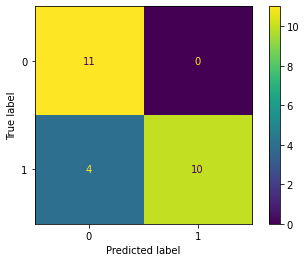

In [16]:
# plotting confusion matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, Y = make_classification(random_state=None)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None)
clf = SVC(random_state=None)
clf.fit(X_train, Y_train)
SVC(random_state=5)
plot_confusion_matrix(clf, X_test, Y_test)  
plt.show()

In [17]:
# calculating accuracy
def calculate_accuracy(predictions, true_labels):          
    return (predictions == true_labels).sum() / true_labels.shape[0]

In [18]:
#finding mean accuracy for 40 k values
predictions = get_predictions(X_train, Y_train, X_test, k=40)
calculate_accuracy(predictions, Y_test)

0.88